<h1 style="text-align:center;">IDFC FAME 2.0 ROUND 2 CODES</h1>


<h2 style="text-align:center;">Exploratory Data Analysis</h2>


In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

import warnings
warnings.filterwarnings(action = 'ignore')

In [87]:
df = pd.read_csv('Training data file.csv', index_col='Customer_No')
df_test = pd.read_csv('Validation Data file.csv', index_col='Customer_No')
df1 = df.copy()
col = df.columns

In [88]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,Max_Ratio_OC_Pending_POS,N_PosBkt_L3m,CoAp_Income,Ever_Default_L12M,Perc_Paymode_Online,...,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,Total_Field_Trails,Total_Resolved,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,,,,,
1,3,61749,38,100.0,5,NaN,0.0,NaN,Yes,0.285714,...,1977,19.0,0.750,46,NaN,NaN,0,5527.0,15,0
2,1,30831,68,100.0,1,NaN,0.0,NaN,Yes,0.000000,...,1990,2.0,0.500,33,NaN,NaN,0,12104.0,2,0
3,1,56708,39,50.0,-3,NaN,0.0,NaN,Yes,0.200000,...,1995,25.0,1.000,28,NaN,0.0,1,153179.0,8,0
4,0,43551,76,NaN,0,NaN,0.0,NaN,No,0.000000,...,1997,0.0,NaN,26,NaN,NaN,2,181589.0,6,0
5,3,15287,23,33.0,11,NaN,0.0,NaN,Yes,0.250000,...,1995,19.0,0.375,28,NaN,NaN,1,10661.0,8,0


Function for Missing values in each column

In [89]:
def missingdata_percentage(df, per=0):
    missing = pd.DataFrame(columns=['category','percentage'])
    for col in df.columns:
        if df[col].isna().values.any():
            count = df[col].isna().sum()
            percentage = 100*df[col].isna().sum()/df.shape[0]
            if percentage>=per:
              missing = missing.append({'category' : col, 'percentage' : percentage, 'count' : int(count)}, ignore_index=True)
    missing.sort_values(by=['percentage'], inplace=True, ascending=False)
    return missing

In [90]:
train_data_Miss = missingdata_percentage(df)
train_data_Miss

,category,percentage,count
3,CoAp_Income,94.931879,77135.0
1,Max_Ratio_OC_Pending_POS,89.407160,72646.0
6,Total_Field_Trails,67.335360,54712.0
7,Total_Resolved,61.911560,50305.0
5,Perc_Paymode_Cheq_Fail,28.893702,23477.0
0,Max_Perc_Def_Chg_Pending,25.941196,21078.0
2,N_PosBkt_L3m,6.569604,5338.0
8,Max_Loan_Balance_Others,0.419677,341.0
4,Max_DPD_L3m,0.299066,243.0


In [91]:
df.drop(columns = ['CoAp_Income','Max_Ratio_OC_Pending_POS','Total_Field_Trails','Total_Resolved'], inplace= True)

In [92]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,
1,3,61749,38,100.0,5,0.0,Yes,0.285714,0.428571,1977,19.0,0.750,46,0,5527.0,15,0
2,1,30831,68,100.0,1,0.0,Yes,0.000000,0.200000,1990,2.0,0.500,33,0,12104.0,2,0
3,1,56708,39,50.0,-3,0.0,Yes,0.200000,0.200000,1995,25.0,1.000,28,1,153179.0,8,0
4,0,43551,76,NaN,0,0.0,No,0.000000,0.000000,1997,0.0,NaN,26,2,181589.0,6,0
5,3,15287,23,33.0,11,0.0,Yes,0.250000,0.250000,1995,19.0,0.375,28,1,10661.0,8,0


In [93]:
missingdata_percentage(df)

,category,percentage,count
3,Perc_Paymode_Cheq_Fail,28.893702,23477.0
0,Max_Perc_Def_Chg_Pending,25.941196,21078.0
1,N_PosBkt_L3m,6.569604,5338.0
4,Max_Loan_Balance_Others,0.419677,341.0
2,Max_DPD_L3m,0.299066,243.0


Training and test data both have similar null value distribution so we can confirm that there are no discrapancies in given data.<br>
Lets check Target_flag distribution.

### Now lets look at the 'Perc_Paymode_Cheq_Fail' column.

In [94]:
df['Target_Flag'][df['Max_Perc_Def_Chg_Pending'].isna()].value_counts()

0    19740
1     1338
Name: Target_Flag, dtype: int64

In [95]:
df['Perc_Paymode_Cheq_Fail']

Customer_No
1        0.750
2        0.500
3        1.000
4          NaN
5        0.375
         ...  
81249    0.500
81250    0.500
81251      NaN
81252    0.400
81253    0.500
Name: Perc_Paymode_Cheq_Fail, Length: 81253, dtype: float64

In [96]:
df.groupby(['Perc_Paymode_Cheq_Fail', 'Target_Flag']).size().reset_index(name='count')

,Perc_Paymode_Cheq_Fail,Target_Flag,count
0,0.000000,0,652
1,0.000000,1,58
2,0.076923,0,1
3,0.090909,0,1
4,0.100000,0,2
5,0.111111,0,3
6,0.125000,0,2
7,0.125000,1,1
8,0.133333,0,1
9,0.142857,0,14


In [97]:
df[(df['Perc_Paymode_Cheq_Fail'] >= 0.5)]['Target_Flag'].value_counts()

0    45474
1     7445
Name: Target_Flag, dtype: int64

In [98]:
df[(df['Perc_Paymode_Cheq_Fail'] >= 0) & (df['Perc_Paymode_Cheq_Fail'] < 0.5)]['Target_Flag'].value_counts()


0    4260
1     597
Name: Target_Flag, dtype: int64

Lets fill with the mode 0.5 because it is between both the values

In [99]:
df['Perc_Paymode_Cheq_Fail'].fillna(0.5, inplace=True)

In [100]:
df['Perc_Paymode_Cheq_Fail'].value_counts()[0.0]

710

* We see that some of the values are 0 thus it means that customer with null values have never attempted to pay via cheque.

Although there is ambiguity its safe to assume 0 inplace of null values.

---

Now lets find some relation between Payment methods and payment failures.

Now lets explore "Max_Perc_Def_Chg_Pending" column:
1. Firstly this column signifies the maximum percentage of default charges pending.

Number of null values:

In [101]:
missingdata_percentage(df)

,category,percentage,count
0,Max_Perc_Def_Chg_Pending,25.941196,21078.0
1,N_PosBkt_L3m,6.569604,5338.0
3,Max_Loan_Balance_Others,0.419677,341.0
2,Max_DPD_L3m,0.299066,243.0


In [102]:
df[df['Target_Flag'] == 0]['Max_Perc_Def_Chg_Pending'].median()

100.0

In [103]:
df[df['Target_Flag'] == 0]['Max_Perc_Def_Chg_Pending'].median()

100.0

In [104]:
df[(df['Max_Perc_Def_Chg_Pending'] == 100)]['Target_Flag'].value_counts()

0    38500
1     6499
Name: Target_Flag, dtype: int64

In [105]:
df['Max_Perc_Def_Chg_Pending'].fillna(100, inplace=True)

Now lets handle "N_Default_L3m" column missing values: 

In [106]:
df['N_PosBkt_L3m'].isna().sum()

5338

In [107]:
df['N_PosBkt_L3m'].value_counts()

0.0    74985
1.0      857
2.0       72
3.0        1
Name: N_PosBkt_L3m, dtype: int64

In [108]:
df['N_PosBkt_L3m'][df['Target_Flag'] == 0].value_counts()

0.0    66176
1.0      587
2.0       47
3.0        1
Name: N_PosBkt_L3m, dtype: int64

3.0 is outlier lets remove it

In [109]:

df.drop(df[df['N_PosBkt_L3m'] == 3].index, inplace=True)


In [110]:
df['N_PosBkt_L3m'][df['Target_Flag'] == 1].value_counts()

0.0    8809
1.0     270
2.0      25
Name: N_PosBkt_L3m, dtype: int64

In [111]:
df['N_PosBkt_L3m'].fillna(0.0, inplace=True)

We see that for missing values defaults are 680 and not defaults are 4658. Which is a proportionate distribution with whole training data.
* It may also correspond to people who recently took the loan. (Less than 3 months ago)<br>
 Anyway since it merely affects 6% of the data so we can test it out with imputing 0, if needed we can try some other methods.
---

Now remaining two columns with missing values are:
1. Max_DPD_L3m
2. Max_Loan_Balance_Others

In [112]:
df['Max_DPD_L3m'].isna().sum()

243

In [113]:
df['Target_Flag'][df['Max_DPD_L3m'].isna()].value_counts()

0    219
1     24
Name: Target_Flag, dtype: int64

In [114]:
df['Target_Flag'][df['Max_DPD_L3m'] == 0.0].value_counts()

0    23603
1     1913
Name: Target_Flag, dtype: int64

In [115]:
df['Target_Flag'][df['Max_DPD_L3m'] > 0.0].value_counts()

0    47646
1     7847
Name: Target_Flag, dtype: int64

We see that about 7.5% of customer defaulted when their days delay in payment was 0.
Also about 14.12% of people defaulted otherwise.

One interesting way to solve this problem would be imputing 0.0 in case target flag is 0 and  15.0 or higher when target flag is 1.

<Axes: >

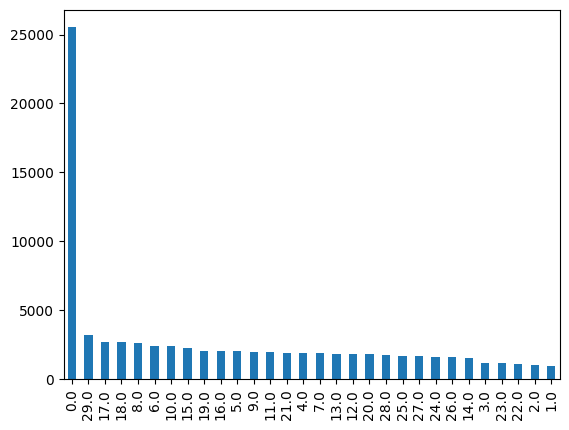

In [116]:
df['Max_DPD_L3m'].value_counts().plot(kind='bar')

In [117]:
from random import randint

df['Max_DPD_L3m'].fillna(0.0 if (df['Target_Flag'] == 0).all() else np.random.randint(15, 30), inplace=True)


Now for column "Max_Loan_Balance_Others":

In [118]:
df['Max_Loan_Balance_Others'].isna().sum()

341

In [119]:
df['Target_Flag'][df['Max_Loan_Balance_Others'].isna()].value_counts()

0    298
1     43
Name: Target_Flag, dtype: int64

In [120]:
df['Max_Loan_Balance_Others'].describe()

count    8.091100e+04
mean     1.462599e+05
std      4.509236e+05
min     -5.425000e+03
25%      9.992000e+03
50%      1.999900e+04
75%      1.100100e+05
max      6.553632e+07
Name: Max_Loan_Balance_Others, dtype: float64

We see there are some negative values in this column lets make them positive.

In [121]:
df['Max_Loan_Balance_Others'] = df['Max_Loan_Balance_Others'].abs()

In [122]:
df['Max_Loan_Balance_Others'].describe()

count    8.091100e+04
mean     1.462605e+05
std      4.509234e+05
min      0.000000e+00
25%      9.992000e+03
50%      1.999900e+04
75%      1.100100e+05
max      6.553632e+07
Name: Max_Loan_Balance_Others, dtype: float64

Let's compare different percentile with Target_Flag

In [123]:
df['Target_Flag'][df['Max_Loan_Balance_Others']<9992].value_counts()

0    17801
1     2403
Name: Target_Flag, dtype: int64

12%, 12.5%, 12.42%, 10.9%
12.32, 

In [124]:
df['Target_Flag'][df['Max_Loan_Balance_Others']<19999].value_counts()

0    35393
1     5036
Name: Target_Flag, dtype: int64

In [125]:
df['Target_Flag'][(9992 < df['Max_Loan_Balance_Others']) & (df['Max_Loan_Balance_Others'] > 19999)].value_counts()

0    35682
1     4686
Name: Target_Flag, dtype: int64

In [126]:
df['Target_Flag'][(19999 < df['Max_Loan_Balance_Others']) & (df['Max_Loan_Balance_Others'] > 110006)].value_counts()


0    18024
1     2204
Name: Target_Flag, dtype: int64

In [127]:
df['Target_Flag'][df['Max_Loan_Balance_Others']>110006].value_counts()

0    18024
1     2204
Name: Target_Flag, dtype: int64

In [128]:
df['Target_Flag'][df['Max_Loan_Balance_Others']== 0.0].value_counts()

0    1787
1     212
Name: Target_Flag, dtype: int64

1. There are zeroes in this column which suggest that column includes people with zero loan. <br>
2. There are very less null values it may quite simply mean that these customer doesn't even have a bank account in other banks.
3. Distribution of target flag over different range of percentile is more or less similar.
4. Moreover distribution of target flag is also quite similar in case when loan balance with others is 0.

 -----> In any case filling these null values with 0 will do no harm.

In [129]:
df['Max_Loan_Balance_Others'].fillna(0, inplace=True)

In [130]:
df.head()

,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,,
1,3,61749,38,100.0,5,0.0,Yes,0.285714,0.428571,1977,19.0,0.750,46,0,5527.0,15,0
2,1,30831,68,100.0,1,0.0,Yes,0.000000,0.200000,1990,2.0,0.500,33,0,12104.0,2,0
3,1,56708,39,50.0,-3,0.0,Yes,0.200000,0.200000,1995,25.0,1.000,28,1,153179.0,8,0
4,0,43551,76,100.0,0,0.0,No,0.000000,0.000000,1997,0.0,0.500,26,2,181589.0,6,0
5,3,15287,23,33.0,11,0.0,Yes,0.250000,0.250000,1995,19.0,0.375,28,1,10661.0,8,0


-----> Both test and train data have similar distribution of missing values.

---

Identifying Numerical Datatypes Columns

In [131]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

df[numerical_features].head()

Number of numerical variables:  16


,N_Default_L3m,Branch_Code,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Perc_Paymode_Online,Perc_Repay_Fail,Birth_Year,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,,
1,3,61749,38,100.0,5,0.0,0.285714,0.428571,1977,19.0,0.750,46,0,5527.0,15,0
2,1,30831,68,100.0,1,0.0,0.000000,0.200000,1990,2.0,0.500,33,0,12104.0,2,0
3,1,56708,39,50.0,-3,0.0,0.200000,0.200000,1995,25.0,1.000,28,1,153179.0,8,0
4,0,43551,76,100.0,0,0.0,0.000000,0.000000,1997,0.0,0.500,26,2,181589.0,6,0
5,3,15287,23,33.0,11,0.0,0.250000,0.250000,1995,19.0,0.375,28,1,10661.0,8,0


Finding Rest of the Columns

In [132]:
for col in df.columns:
    if col not in numerical_features:
        print(col)

Ever_Default_L12M


In [133]:
df['Ever_Default_L12M'].unique()

array(['Yes', 'No'], dtype=object)

Changing "Yes" and "No" to 0 and 1 respectively

In [134]:
df['Ever_Default_L12M'] = df['Ever_Default_L12M'].replace({'Yes': 1, 'No': 0})

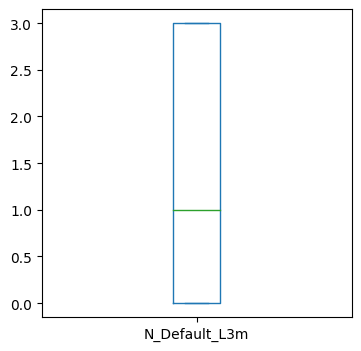

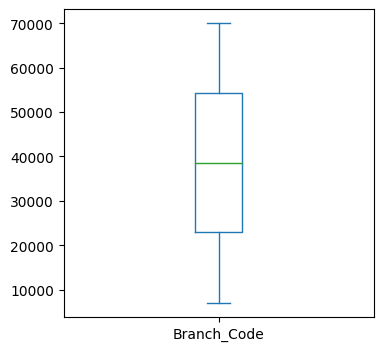

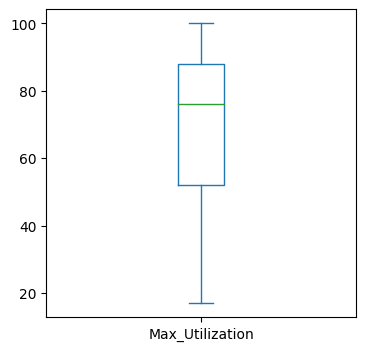

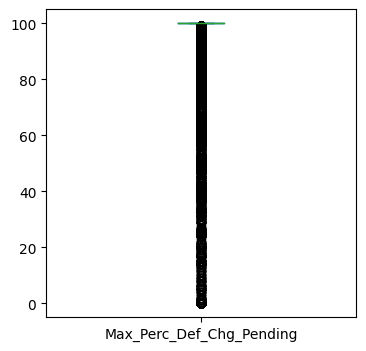

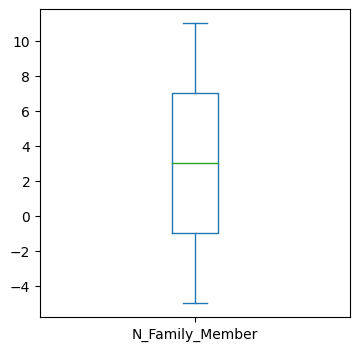

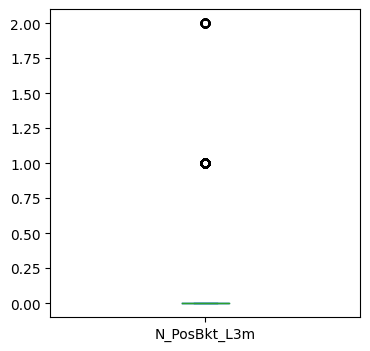

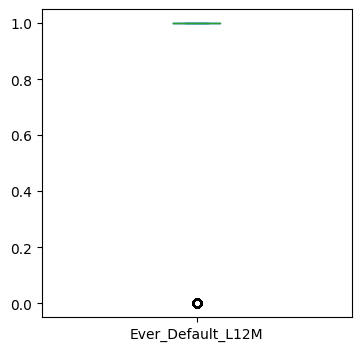

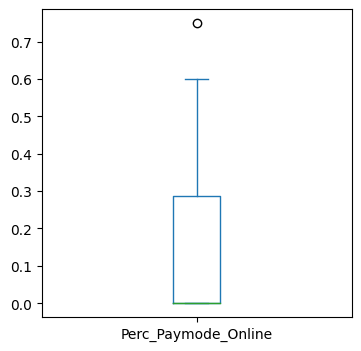

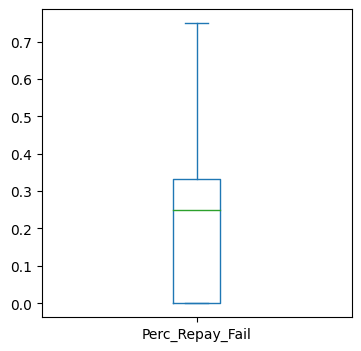

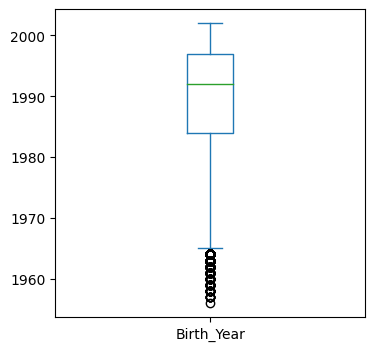

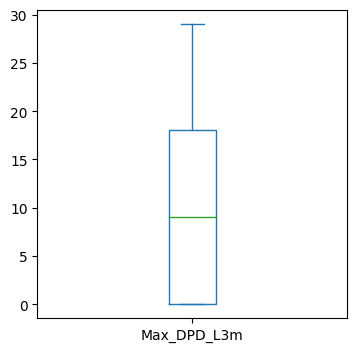

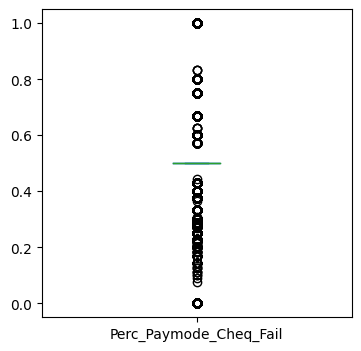

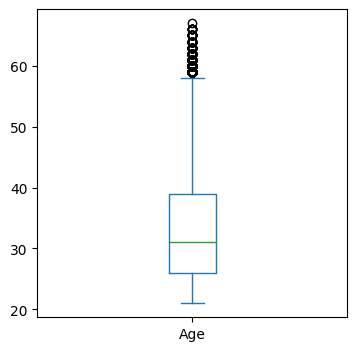

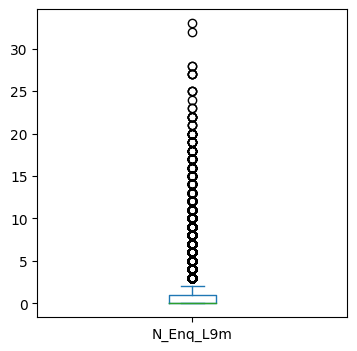

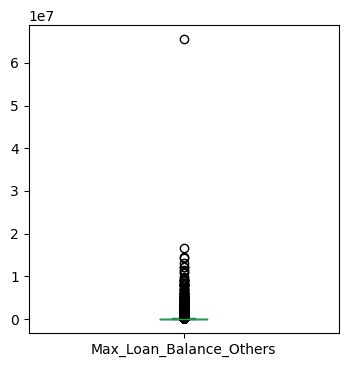

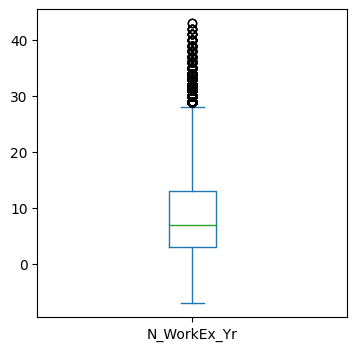

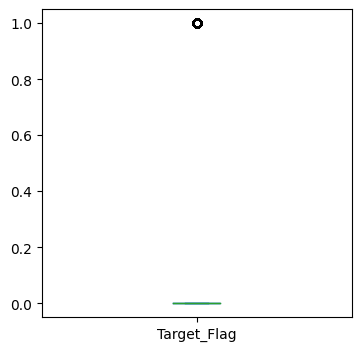

In [135]:
for col in df.columns:
    plt.figure(figsize=(4,4))
    if df[col].dtype != 'O':
        df[col].plot(kind='box')

In [136]:
df['N_Family_Member'] = df['N_Family_Member'].abs()

In [137]:
df.columns

Index(['N_Default_L3m', 'Branch_Code', 'Max_Utilization',
       'Max_Perc_Def_Chg_Pending', 'N_Family_Member', 'N_PosBkt_L3m',
       'Ever_Default_L12M', 'Perc_Paymode_Online', 'Perc_Repay_Fail',
       'Birth_Year', 'Max_DPD_L3m', 'Perc_Paymode_Cheq_Fail', 'Age',
       'N_Enq_L9m', 'Max_Loan_Balance_Others', 'N_WorkEx_Yr', 'Target_Flag'],
      dtype='object')

In [138]:
df['Perc_Paymode_Online'].value_counts()

0.000000    41040
0.333333     8244
0.250000     6211
0.200000     3352
0.500000     3344
0.285714     3328
0.166667     2546
0.400000     2025
0.428571     1977
0.375000     1958
0.125000     1875
0.142857     1362
0.222222     1261
0.111111     1190
0.300000      377
0.100000      231
0.272727      225
0.363636      109
0.090909      107
0.181818      105
0.230769       64
0.083333       57
0.444444       44
0.307692       38
0.214286       21
0.153846       20
0.266667       18
0.571429       16
0.076923       15
0.066667       10
0.357143        8
0.294118        8
0.384615        8
0.416667        8
0.071429        7
0.187500        7
0.600000        7
0.454545        6
0.235294        6
0.157895        3
0.133333        3
0.117647        2
0.062500        2
0.555556        1
0.411765        1
0.176471        1
0.482759        1
0.388889        1
0.210526        1
0.750000        1
Name: Perc_Paymode_Online, dtype: int64

In [139]:
df[df['Perc_Paymode_Online'] > 0]['Target_Flag'].value_counts()

0    34097
1     6115
Name: Target_Flag, dtype: int64

In [140]:

# Calculate the value counts of Perc_Paymode
perc_paymode_counts = df['Perc_Paymode_Online'].value_counts()

# Filter for values with count > 10
filtered_values = perc_paymode_counts[perc_paymode_counts > 100].index

# Calculate the value counts of Target for each unique Perc_Paymode value
result = {}
for value in filtered_values:
    target_counts = df[df['Perc_Paymode_Online'] == value]['Target_Flag'].value_counts()
    result[value] = target_counts

result = pd.DataFrame(result)
result.sort_index(axis=1)


,0.000000,0.090909,0.100000,0.111111,0.125000,0.142857,0.166667,0.181818,0.200000,0.222222,0.250000,0.272727,0.285714,0.300000,0.333333,0.363636,0.375000,0.400000,0.428571,0.500000
0,37371,96,206,1048,1658,1140,2161,87,2884,1087,5256,181,2874,334,6883,95,1593,1715,1618,2848
1,3669,11,25,142,217,222,385,18,468,174,955,44,454,43,1361,14,365,310,359,496


In [141]:
df = df[df['N_Enq_L9m'] < 24]

In [142]:
df.drop(columns=['Branch_Code', 'Birth_Year'], inplace=True)

In [143]:
df.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,
1,3,38,100.0,5,0.0,1,0.285714,0.428571,19.0,0.750,46,0,5527.0,15,0
2,1,68,100.0,1,0.0,1,0.000000,0.200000,2.0,0.500,33,0,12104.0,2,0
3,1,39,50.0,3,0.0,1,0.200000,0.200000,25.0,1.000,28,1,153179.0,8,0
4,0,76,100.0,0,0.0,0,0.000000,0.000000,0.0,0.500,26,2,181589.0,6,0
5,3,23,33.0,11,0.0,1,0.250000,0.250000,19.0,0.375,28,1,10661.0,8,0


In [144]:
df[df<0]

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-7.0,NaN
81250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
df['N_WorkEx_Yr'] = df['N_WorkEx_Yr'].abs()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81240 entries, 1 to 81253
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   N_Default_L3m             81240 non-null  int64  
 1   Max_Utilization           81240 non-null  int64  
 2   Max_Perc_Def_Chg_Pending  81240 non-null  float64
 3   N_Family_Member           81240 non-null  int64  
 4   N_PosBkt_L3m              81240 non-null  float64
 5   Ever_Default_L12M         81240 non-null  int64  
 6   Perc_Paymode_Online       81240 non-null  float64
 7   Perc_Repay_Fail           81240 non-null  float64
 8   Max_DPD_L3m               81240 non-null  float64
 9   Perc_Paymode_Cheq_Fail    81240 non-null  float64
 10  Age                       81240 non-null  int64  
 11  N_Enq_L9m                 81240 non-null  int64  
 12  Max_Loan_Balance_Others   81240 non-null  float64
 13  N_WorkEx_Yr               81240 non-null  int64  
 14  Target

In [147]:
df.describe()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
count,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,81240.000000,8.124000e+04,81240.000000,81240.000000
mean,1.463245,72.798941,89.548695,4.778213,0.012322,0.792171,0.142991,0.216267,10.520852,0.563957,33.351071,0.847181,1.455999e+05,9.413343,0.120421
std,1.192509,20.464486,26.868336,3.202047,0.118078,0.405756,0.162988,0.159888,9.757093,0.173676,8.946716,1.744016,4.500399e+05,7.353928,0.325455
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,52.000000,100.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.500000,26.000000,0.000000,9.910000e+03,4.000000,0.000000
50%,1.000000,76.000000,100.000000,4.000000,0.000000,1.000000,0.000000,0.250000,9.000000,0.500000,31.000000,0.000000,1.993300e+04,7.000000,0.000000
75%,3.000000,88.000000,100.000000,7.000000,0.000000,1.000000,0.285714,0.333333,18.000000,0.500000,39.000000,1.000000,1.093920e+05,13.000000,0.000000
max,3.000000,100.000000,100.000000,11.000000,2.000000,1.000000,0.750000,0.750000,29.000000,1.000000,67.000000,23.000000,6.553632e+07,43.000000,1.000000


In [148]:
df.head()

,N_Default_L3m,Max_Utilization,Max_Perc_Def_Chg_Pending,N_Family_Member,N_PosBkt_L3m,Ever_Default_L12M,Perc_Paymode_Online,Perc_Repay_Fail,Max_DPD_L3m,Perc_Paymode_Cheq_Fail,Age,N_Enq_L9m,Max_Loan_Balance_Others,N_WorkEx_Yr,Target_Flag
Customer_No,,,,,,,,,,,,,,,
1,3,38,100.0,5,0.0,1,0.285714,0.428571,19.0,0.750,46,0,5527.0,15,0
2,1,68,100.0,1,0.0,1,0.000000,0.200000,2.0,0.500,33,0,12104.0,2,0
3,1,39,50.0,3,0.0,1,0.200000,0.200000,25.0,1.000,28,1,153179.0,8,0
4,0,76,100.0,0,0.0,0,0.000000,0.000000,0.0,0.500,26,2,181589.0,6,0
5,3,23,33.0,11,0.0,1,0.250000,0.250000,19.0,0.375,28,1,10661.0,8,0


In [216]:
df.to_csv('Preprocessed_02.csv')

In [149]:


from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc


import warnings
warnings.filterwarnings(action = 'ignore')

In [150]:
y = df['Target_Flag']
X = df.drop('Target_Flag', axis=1)

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y, random_state=123)

In [ ]:
def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [152]:
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


In [153]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


In [154]:
from sklearn.utils import resample

Train_mer=np.concatenate((np.array(X_train),np.array(y_train).reshape(56868 ,1)),axis=1)

majority =Train_mer[Train_mer[:,-1]==0]
minority =Train_mer[Train_mer[:,-1]==1]

downsample =resample(majority,replace=False,n_samples=minority.shape[0])
X_train_new =np.concatenate([downsample,minority])

In [155]:
y_train_under_sampled =X_train_new[:,-1]
X_train_new =X_train_new[:,:-1]

In [156]:
X_train_new=pd.DataFrame(X_train_new,columns=X_train.columns)

In [174]:
scaler_smote = StandardScaler()
scaler_downsample = StandardScaler()
X_train_smote = scaler_smote.fit_transform(X_train_smote)
X_train_under_sampled = scaler_downsample.fit_transform(X_train_new)

X_test_under_sampled = scaler_downsample.transform(X_test)
X_test_smote = scaler_smote.transform(X_test)

In [158]:
X_train_under_sampled = pd.DataFrame(X_train_under_sampled, columns=X_train.columns)

In [159]:
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)

In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.ensemble import RandomForestClassifier

In [161]:
def evaluate_model(model, class_balance, X_test, y_test):
    
    model_acc = model.score(X_test, y_test)
    print("Accuracy ({}): {:.2f}%".format(class_balance, model_acc * 100))
    
    y_pred = model.predict(X_test)
    
    cm = confusion_matrix(y_test, y_pred)
    clr = classification_report(y_test, y_pred)
    
    plt.figure(figsize=(4, 4))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()
    
    print("Classification Report:\n----------------------\n", clr)

In [162]:
def get_roc_auc(y_test, predicted_proba):
    fpr, tpr, _ = roc_curve(y_test, predicted_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

In [163]:
logistic = LogisticRegression()
logistic_model_smote = logistic.fit(X_train_smote, y_train_smote)
logistic_model_under_sample = logistic.fit(X_train_under_sampled, y_train_under_sampled)

In [175]:
y_proba_logistic_smote = logistic_model_smote.predict_proba(X_test_smote)
y_proba_logistic_smote = y_proba_logistic_smote[:,1]

In [176]:
y_proba_logistic_uder_sample = logistic_model_under_sample.predict_proba(X_test_under_sampled)
y_proba_logistic_uder_sample = y_proba_logistic_uder_sample[:,1]

Accuracy (none): 64.95%


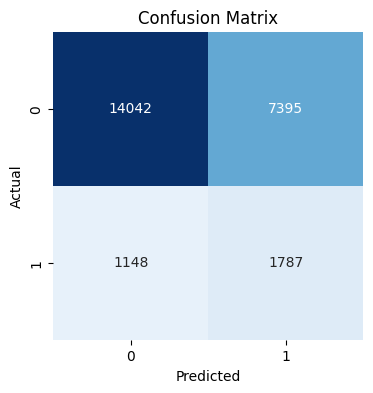

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.92      0.66      0.77     21437
           1       0.19      0.61      0.29      2935

    accuracy                           0.65     24372
   macro avg       0.56      0.63      0.53     24372
weighted avg       0.84      0.65      0.71     24372



In [177]:
evaluate_model(logistic_model_smote, 'none', X_test_smote, y_test)

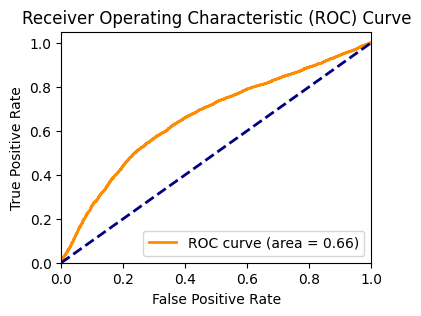

In [178]:
get_roc_auc(y_test, y_proba_logistic_smote)

Accuracy (none): 87.30%


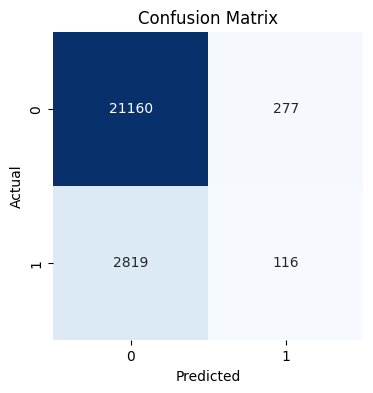

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.88      0.99      0.93     21437
           1       0.30      0.04      0.07      2935

    accuracy                           0.87     24372
   macro avg       0.59      0.51      0.50     24372
weighted avg       0.81      0.87      0.83     24372



In [179]:
evaluate_model(logistic_model_under_sample, 'none', X_test_under_sampled, y_test)


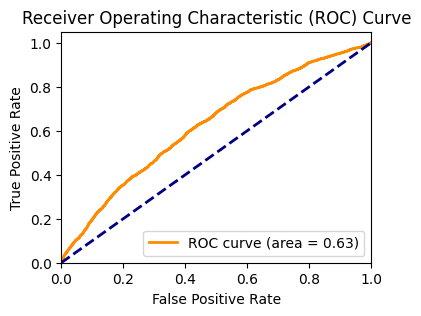

In [180]:
get_roc_auc(y_test, y_proba_logistic_uder_sample)

In [170]:
X_train.columns

Index(['N_Default_L3m', 'Max_Utilization', 'Max_Perc_Def_Chg_Pending',
       'N_Family_Member', 'N_PosBkt_L3m', 'Ever_Default_L12M',
       'Perc_Paymode_Online', 'Perc_Repay_Fail', 'Max_DPD_L3m',
       'Perc_Paymode_Cheq_Fail', 'Age', 'N_Enq_L9m', 'Max_Loan_Balance_Others',
       'N_WorkEx_Yr'],
      dtype='object')

In [181]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from matplotlib.legend_handler import HandlerLine2D

In [185]:

# example of grid searching key hyperparametres for logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
# define dataset

# define models and parameters
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
# define grid search
grid = dict(solver=solvers,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_smote, y_train_smote)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.710779 using {'C': 0.01, 'solver': 'lbfgs'}
0.709879 (0.004411) with: {'C': 100, 'solver': 'newton-cg'}
0.709876 (0.004408) with: {'C': 100, 'solver': 'lbfgs'}
0.709879 (0.004411) with: {'C': 100, 'solver': 'liblinear'}
0.709873 (0.004406) with: {'C': 10, 'solver': 'newton-cg'}
0.709873 (0.004406) with: {'C': 10, 'solver': 'lbfgs'}
0.709869 (0.004401) with: {'C': 10, 'solver': 'liblinear'}
0.709879 (0.004443) with: {'C': 1.0, 'solver': 'newton-cg'}
0.709879 (0.004443) with: {'C': 1.0, 'solver': 'lbfgs'}
0.709883 (0.004444) with: {'C': 1.0, 'solver': 'liblinear'}
0.709973 (0.004494) with: {'C': 0.1, 'solver': 'newton-cg'}
0.709973 (0.004496) with: {'C': 0.1, 'solver': 'lbfgs'}
0.709973 (0.004494) with: {'C': 0.1, 'solver': 'liblinear'}
0.710772 (0.004778) with: {'C': 0.01, 'solver': 'newton-cg'}
0.710779 (0.004772) with: {'C': 0.01, 'solver': 'lbfgs'}
0.710762 (0.004778) with: {'C': 0.01, 'solver': 'liblinear'}


In [210]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix , f1_score , accuracy_score , classification_report , log_loss
from sklearn.model_selection import cross_val_score

In [211]:
models = []
models.append(("XGBClassifier", XGBClassifier(objective = "binary:logistic" , random_state = 42)))
models.append(("CatBoostClassifier", CatBoostClassifier(random_state = 42 , verbose = 0)))
models.append(("RandomForest", RandomForestClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Extra Tree Classifier", ExtraTreesClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Bagging Classifier", BaggingClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Gradient Boosting Classifier" , GradientBoostingClassifier(random_state = 42)))
models.append(("LightGBM" , LGBMClassifier(random_state = 42 , n_estimators = 200)))
models.append(("Logistic Regression", LogisticRegression(random_state = 42 , solver = "liblinear")))
models.append(("KNeigbors", KNeighborsClassifier()))

In [214]:
def evaluation_metrics(model , X_train , y_train , X_test , y_test , params = False):
    
    mod = model[1].fit(X_train , y_train)
    preds = model[1].predict(X_test)
    accuracies = cross_val_score(estimator = model[1], X = X_train , y = y_train, cv = 5 , scoring = "f1")
    cm = confusion_matrix(y_test , preds)
    cf = classification_report(y_test , preds)
    f1 = 100 * (f1_score(y_test , preds))
    pred = model[1].predict_proba(X_test)
    score = log_loss(y_test , pred)
    
    
    print("\n")
    print(model[0])
    
    print("\n")
    if params:
        print(f"Best Parameters are : \n" , model[1].best_params_)
        print("\n")
        
    print(f"Confusion matrix : \n")
    plt.figure(figsize = (12 , 8))
    sns.heatmap(cm, cmap = 'coolwarm', annot = True, annot_kws = {'fontsize': 20})
    plt.show()
    print("\n")
    
    print(f"Training score : {model[1].score(X_train , y_train):.4f}")
    print("\n") 
    
    print(f"Test Score : {model[1].score(X_test , y_test):.4f}")
    print("\n")
    
    print(f"K-fold accuracy : {np.mean(accuracies):.4f}")
    print("\n")
    
    print(f"Standard Deviation of Accuracies in k-fold : {np.std(accuracies):.4f}")
    print("\n")
    
    print(f"Classification report : \n\n{cf}")
    print("\n")
    
    print(f"F1 Score : {f1}")
    print("\n")
    
    print(f"Evaluation Score : {score}")
    print("\n")

    print("\n\n")
    
    sam = []
    sam.append(model[0])
    sam.append(model[1].score(X_train , y_train))
    sam.append(model[1].score(X_test , y_test))
    sam.append(np.mean(accuracies))
    sam.append(np.std(accuracies))
    sam.append(f1)
    sam.append(score)
    
    return sam , mod, get_roc_auc(y_test, pred[:,1])



XGBClassifier


Confusion matrix : 



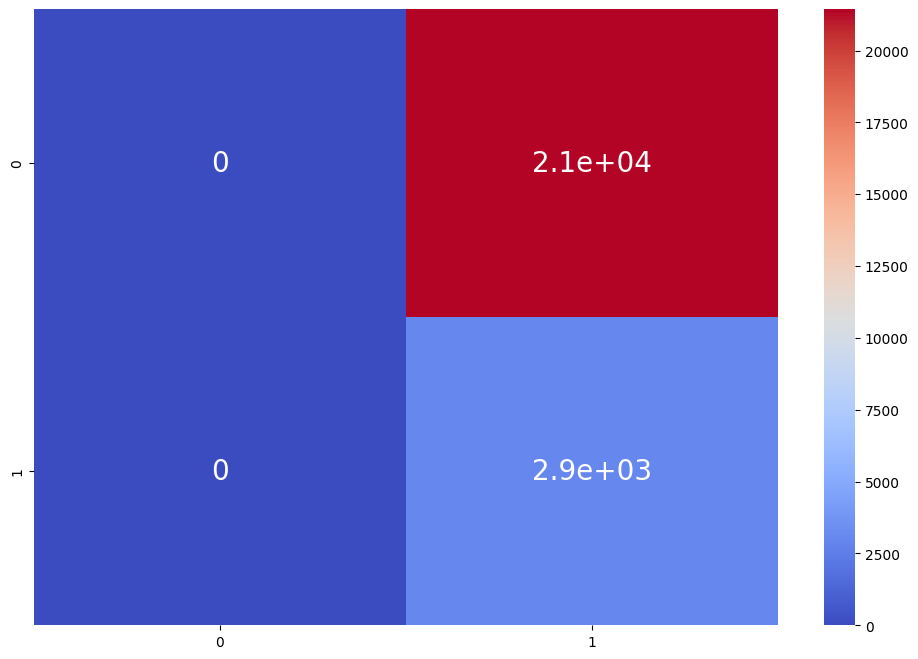



Training score : 0.9171


Test Score : 0.1204


K-fold accuracy : 0.8664


Standard Deviation of Accuracies in k-fold : 0.1999


Classification report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     21437
           1       0.12      1.00      0.21      2935

    accuracy                           0.12     24372
   macro avg       0.06      0.50      0.11     24372
weighted avg       0.01      0.12      0.03     24372



F1 Score : 21.496319625004574


Evaluation Score : 8.606265815450923







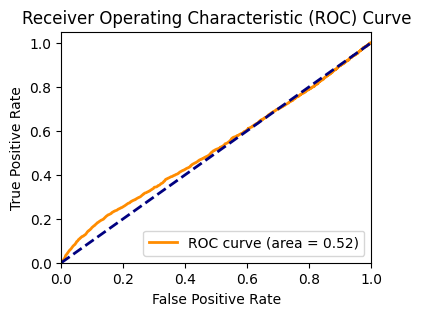



CatBoostClassifier


Confusion matrix : 



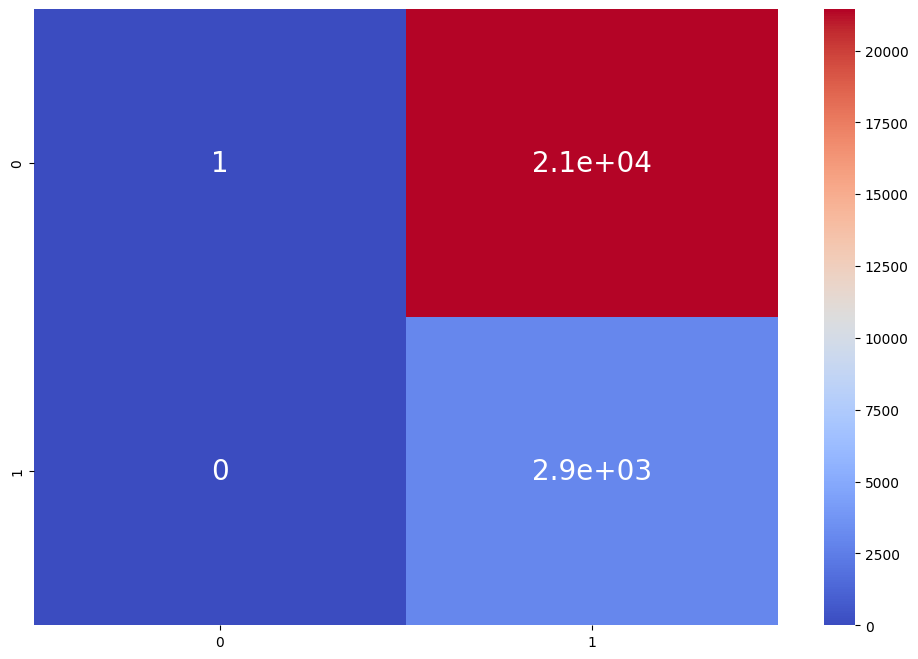



Training score : 0.9215


Test Score : 0.1205


K-fold accuracy : 0.8735


Standard Deviation of Accuracies in k-fold : 0.2000


Classification report : 

              precision    recall  f1-score   support

           0       1.00      0.00      0.00     21437
           1       0.12      1.00      0.21      2935

    accuracy                           0.12     24372
   macro avg       0.56      0.50      0.11     24372
weighted avg       0.89      0.12      0.03     24372



F1 Score : 21.497106862960518


Evaluation Score : 6.8922441986768614







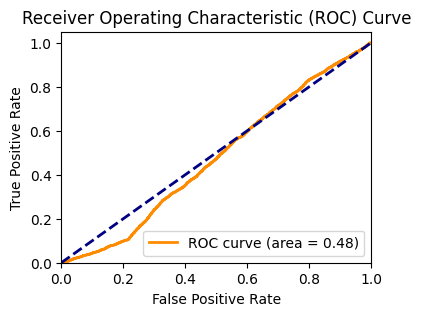



RandomForest


Confusion matrix : 



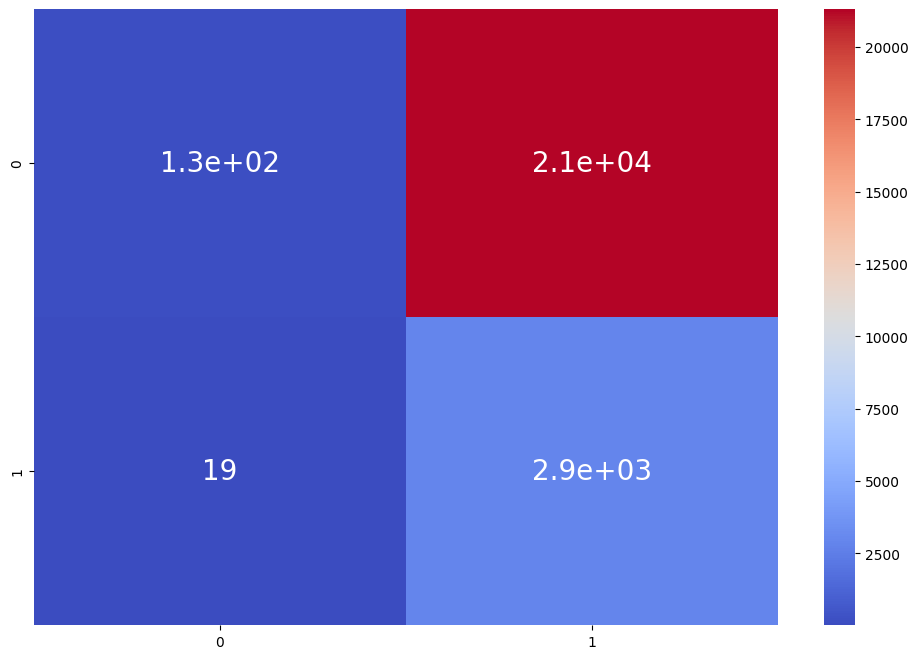



Training score : 0.9994


Test Score : 0.1249


K-fold accuracy : 0.8769


Standard Deviation of Accuracies in k-fold : 0.1839


Classification report : 

              precision    recall  f1-score   support

           0       0.87      0.01      0.01     21437
           1       0.12      0.99      0.21      2935

    accuracy                           0.12     24372
   macro avg       0.50      0.50      0.11     24372
weighted avg       0.78      0.12      0.04     24372



F1 Score : 21.47275405007364


Evaluation Score : 13.113811178887211







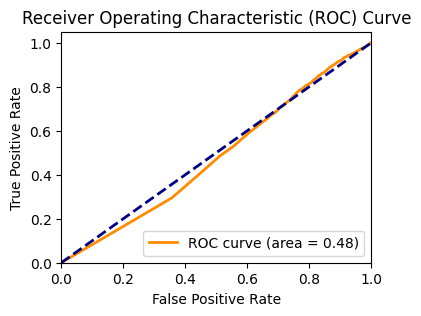



Extra Tree Classifier


Confusion matrix : 



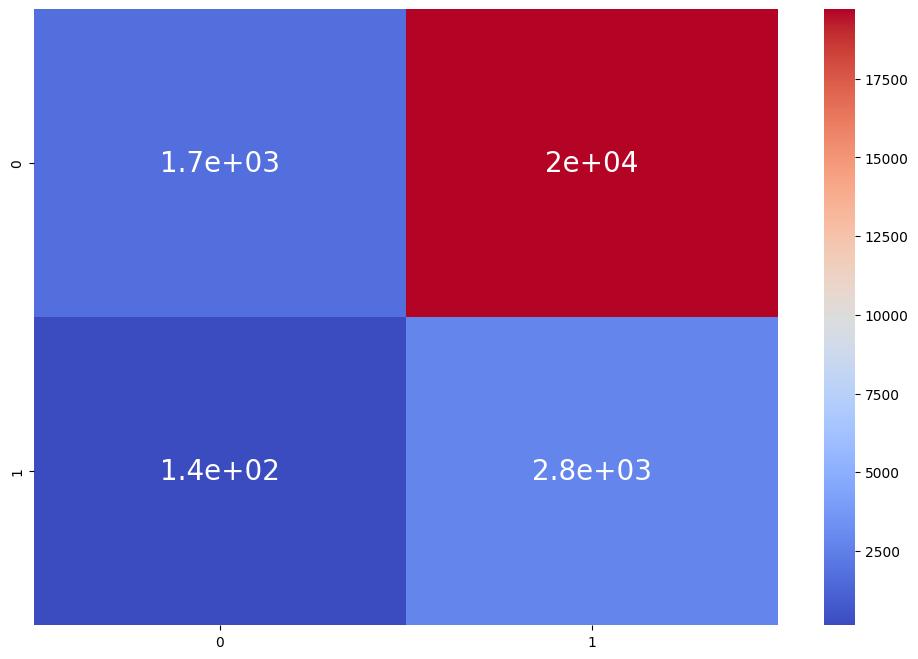



Training score : 0.9994


Test Score : 0.1859


K-fold accuracy : 0.8734


Standard Deviation of Accuracies in k-fold : 0.1526


Classification report : 

              precision    recall  f1-score   support

           0       0.92      0.08      0.15     21437
           1       0.12      0.95      0.22      2935

    accuracy                           0.19     24372
   macro avg       0.52      0.52      0.18     24372
weighted avg       0.83      0.19      0.16     24372



F1 Score : 21.968773351162152


Evaluation Score : 4.532418925566602







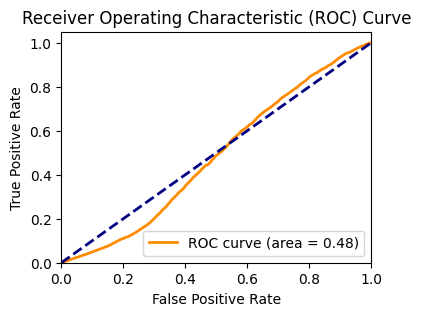



Bagging Classifier


Confusion matrix : 



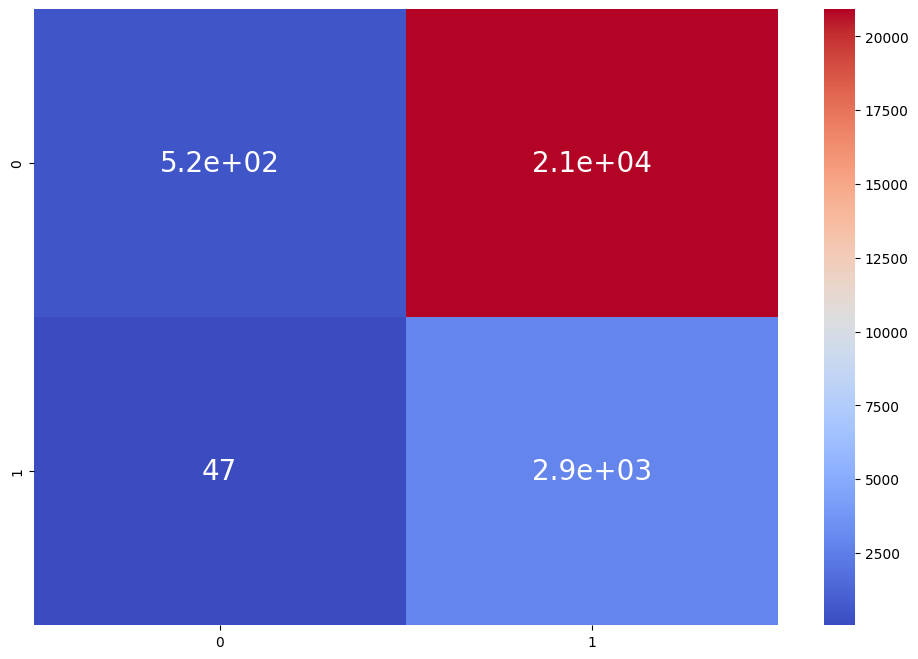



Training score : 0.9994


Test Score : 0.1396


K-fold accuracy : 0.8782


Standard Deviation of Accuracies in k-fold : 0.1767


Classification report : 

              precision    recall  f1-score   support

           0       0.92      0.02      0.05     21437
           1       0.12      0.98      0.22      2935

    accuracy                           0.14     24372
   macro avg       0.52      0.50      0.13     24372
weighted avg       0.82      0.14      0.07     24372



F1 Score : 21.596560104692465


Evaluation Score : 25.228834054254985







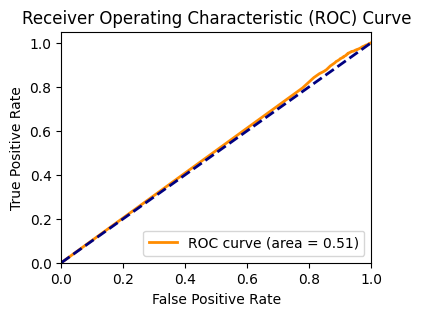



Gradient Boosting Classifier


Confusion matrix : 



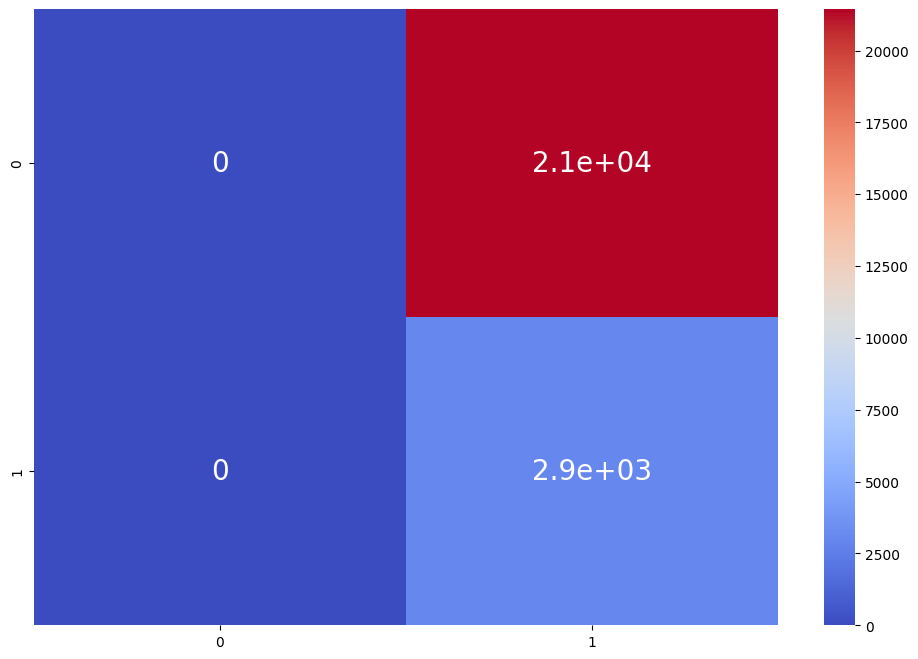



Training score : 0.8670


Test Score : 0.1204


K-fold accuracy : 0.8259


Standard Deviation of Accuracies in k-fold : 0.1788


Classification report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     21437
           1       0.12      1.00      0.21      2935

    accuracy                           0.12     24372
   macro avg       0.06      0.50      0.11     24372
weighted avg       0.01      0.12      0.03     24372



F1 Score : 21.496319625004574


Evaluation Score : 3.3113783830986723







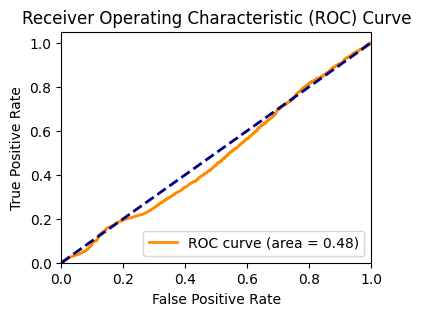

[LightGBM] [Info] Number of positive: 50020, number of negative: 50020
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005330 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2005
[LightGBM] [Info] Number of data points in the train set: 100040, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 40016, number of negative: 40016
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008062 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2003
[LightGBM] [Info] Number of data points in the train set: 80032, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Number of positive: 40016, number of ne

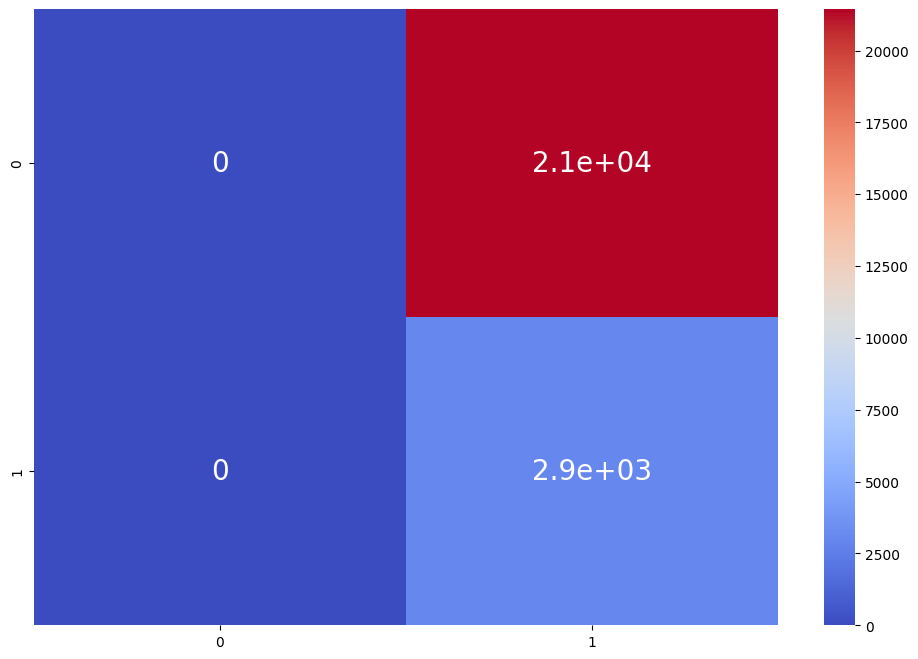



Training score : 0.9161


Test Score : 0.1204


K-fold accuracy : 0.8707


Standard Deviation of Accuracies in k-fold : 0.2015


Classification report : 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     21437
           1       0.12      1.00      0.21      2935

    accuracy                           0.12     24372
   macro avg       0.06      0.50      0.11     24372
weighted avg       0.01      0.12      0.03     24372



F1 Score : 21.496319625004574


Evaluation Score : 6.898062878641671







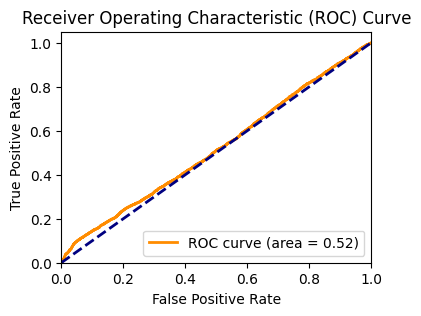



Logistic Regression


Confusion matrix : 



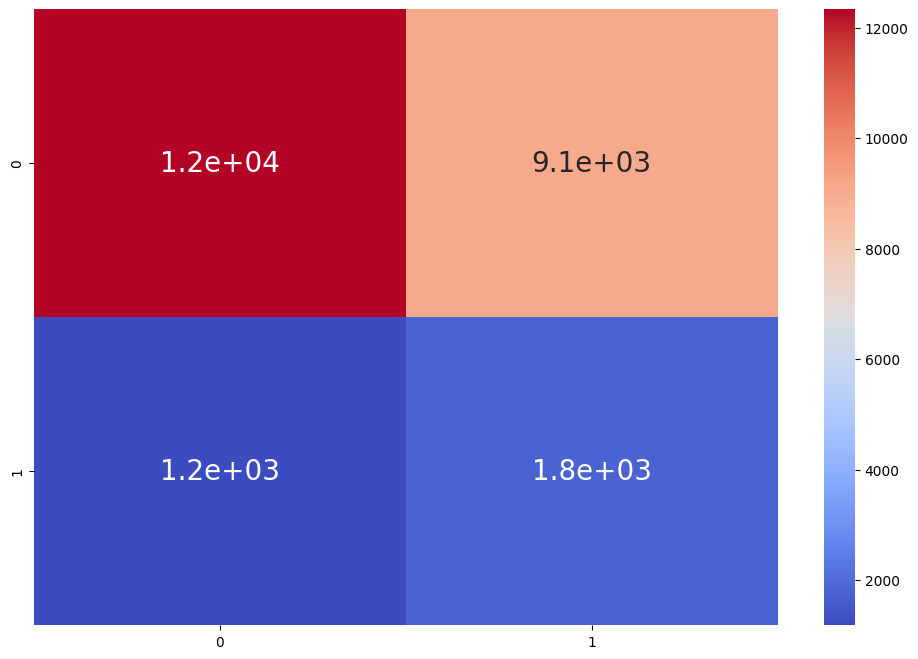



Training score : 0.7100


Test Score : 0.5780


K-fold accuracy : 0.6995


Standard Deviation of Accuracies in k-fold : 0.0581


Classification report : 

              precision    recall  f1-score   support

           0       0.91      0.58      0.71     21437
           1       0.16      0.60      0.25      2935

    accuracy                           0.58     24372
   macro avg       0.54      0.59      0.48     24372
weighted avg       0.82      0.58      0.65     24372



F1 Score : 25.398897592109083


Evaluation Score : 0.7064147459135984







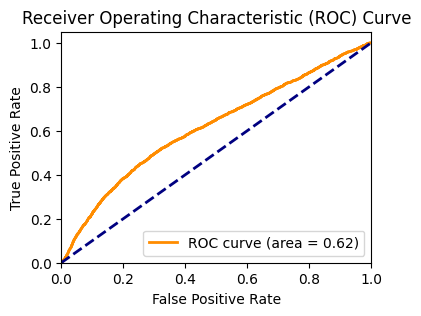



KNeigbors


Confusion matrix : 



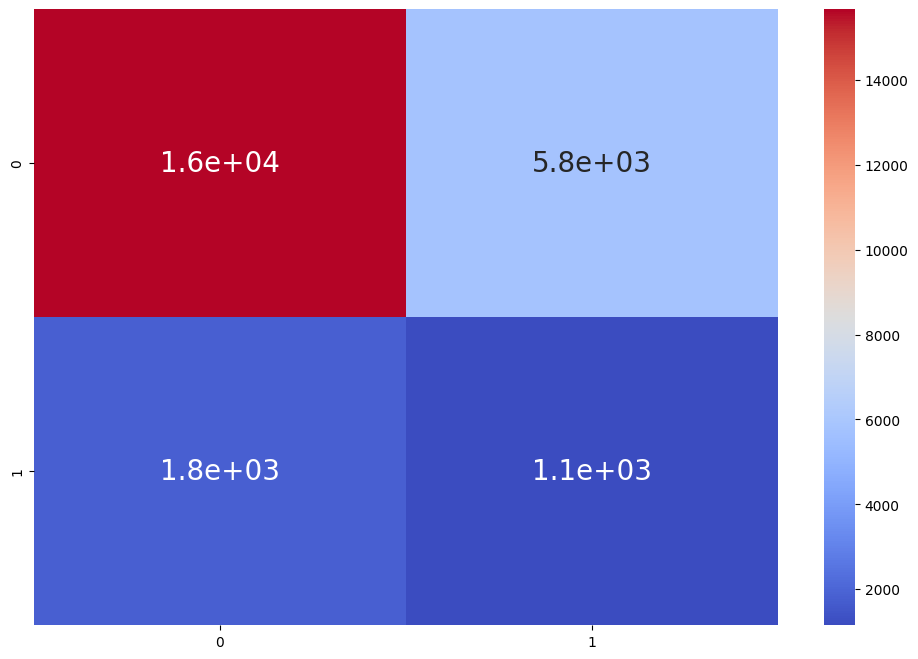



Training score : 0.8776


Test Score : 0.6901


K-fold accuracy : 0.7979


Standard Deviation of Accuracies in k-fold : 0.0457


Classification report : 

              precision    recall  f1-score   support

           0       0.90      0.73      0.81     21437
           1       0.17      0.39      0.23      2935

    accuracy                           0.69     24372
   macro avg       0.53      0.56      0.52     24372
weighted avg       0.81      0.69      0.74     24372



F1 Score : 23.325213154689408


Evaluation Score : 2.5866237729099875







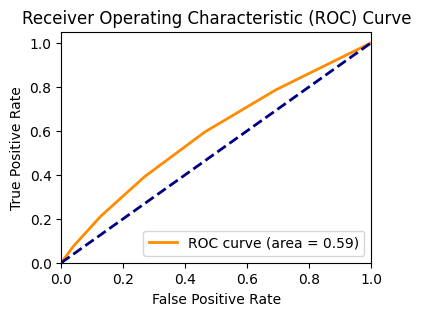

CPU times: total: 36min 41s
Wall time: 37min 56s


In [215]:
%%time

pre_final = []

for i in models:
    sam = evaluation_metrics(i , X_train_smote , y_train_smote , X_test_smote , y_test)
    pre_final.append(sam)
